   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

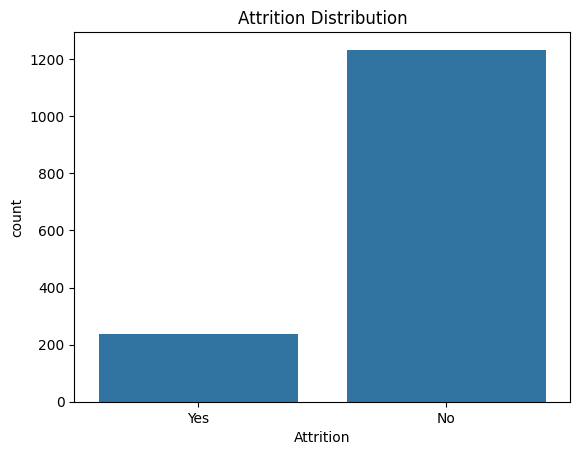

/tmp/ipython-input-3912813678.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')


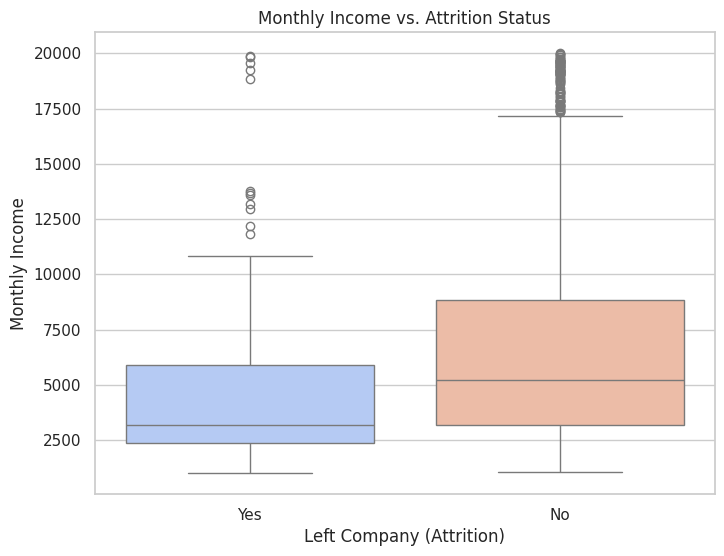

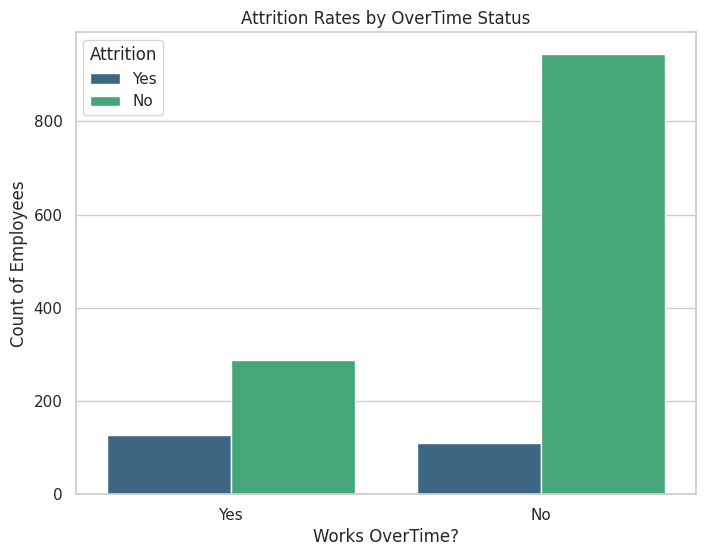

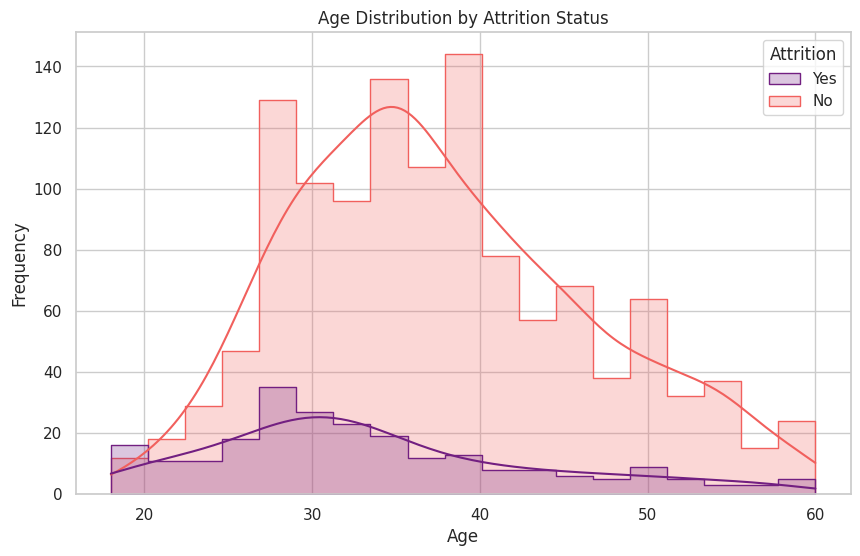

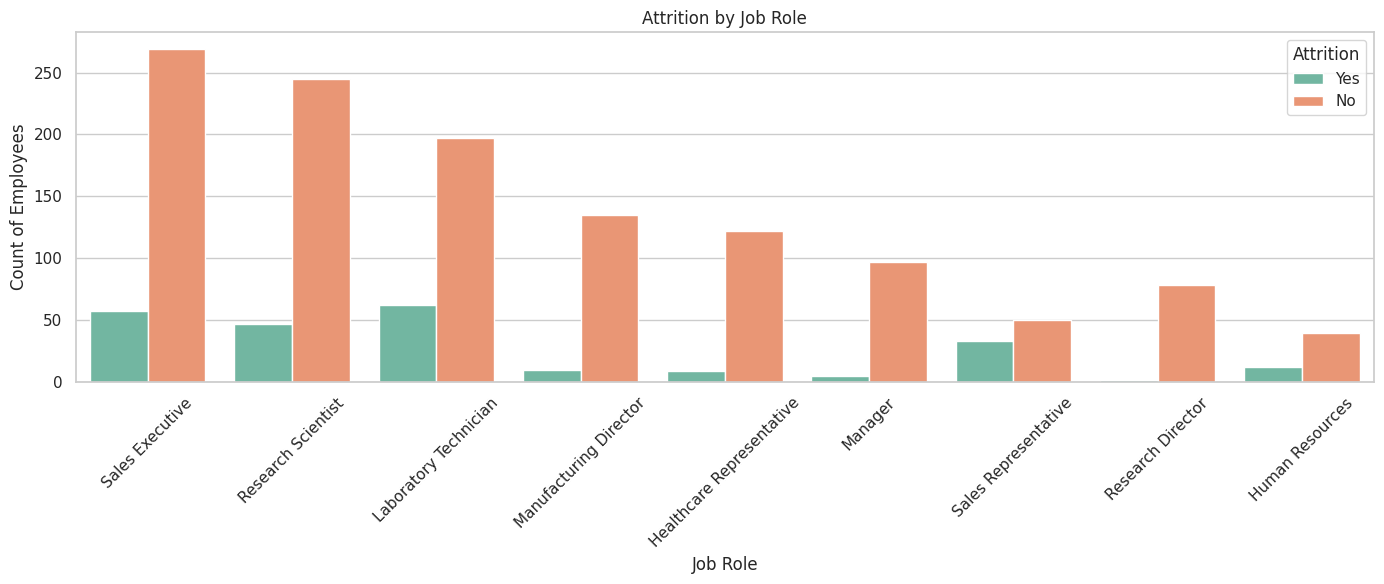

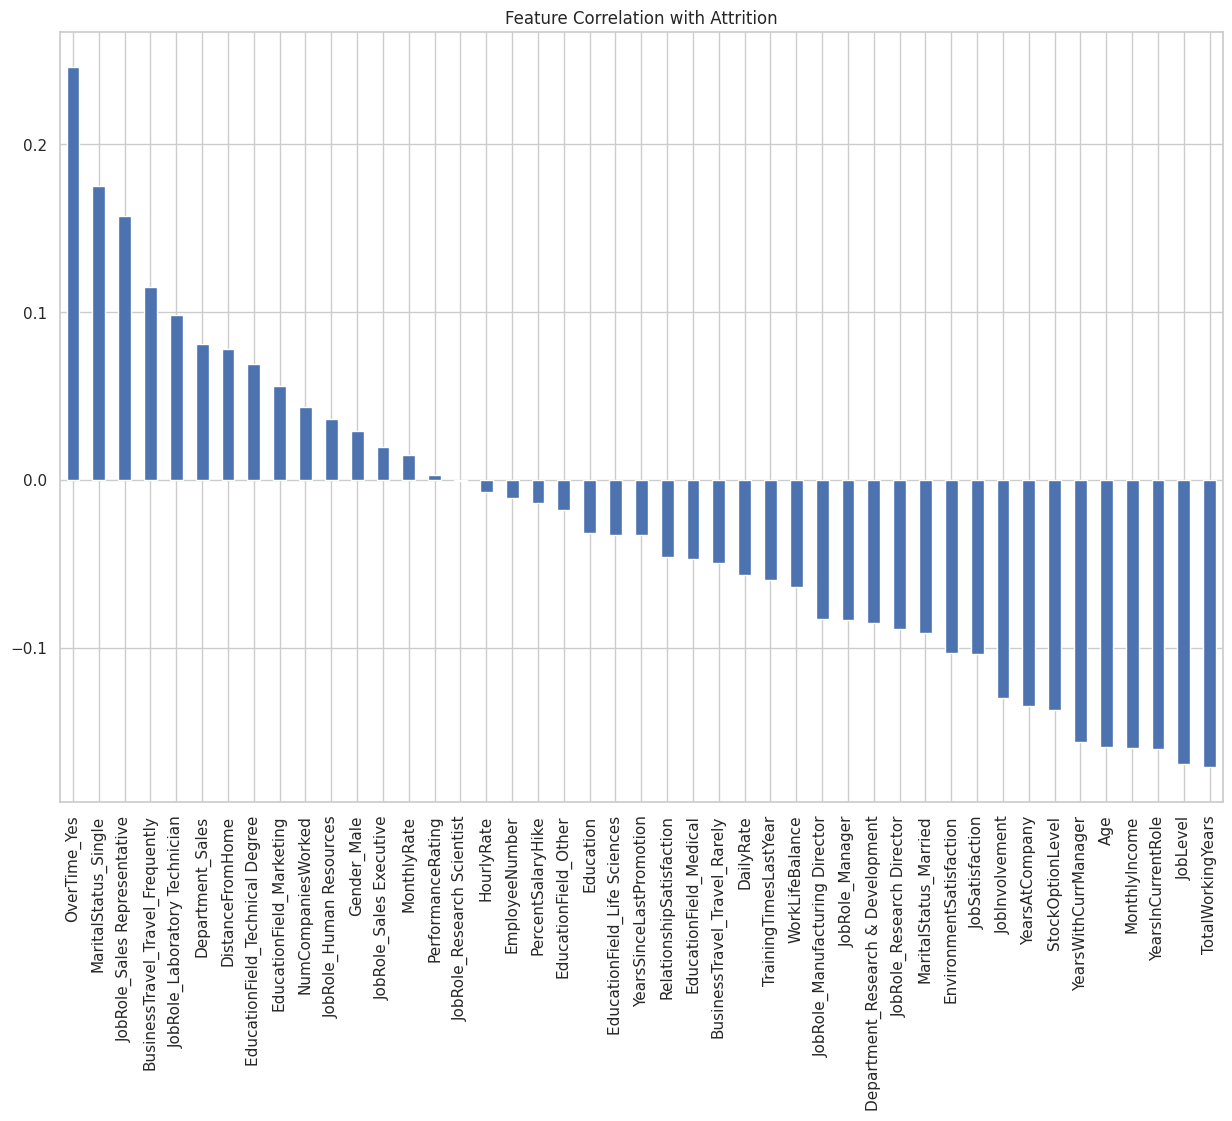

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.70      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.79      0.55      0.56       441
weighted avg       0.85      0.87      0.83       441



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

# Quick inspection
print(df.head())
print(df.info())  # Checks for null values and data types

# Drop useless columns
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Check for duplicates
print(df.duplicated().sum())

sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

# Set a nice aesthetic for all plots
sns.set_theme(style="whitegrid")

# --- Visualization 1: Income vs. Attrition (Boxplot) ---
# Purpose: See if people who leave (Yes) generally have a lower median income than those who stay (No).
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title('Monthly Income vs. Attrition Status')
plt.xlabel('Left Company (Attrition)')
plt.ylabel('Monthly Income')
plt.show()

# --- Visualization 2: Overtime vs. Attrition (Countplot) ---
# Purpose: Compare the count of people leaving who work overtime vs. those who don't.
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition Rates by OverTime Status')
plt.xlabel('Works OverTime?')
plt.ylabel('Count of Employees')
plt.legend(title='Attrition')
plt.show()

# --- Visualization 3: Age Distribution (Histogram with KDE) ---
# Purpose: Check if younger employees are leaving at a higher frequency than older ones.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, element="step", palette='magma')
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# --- Visualization 4: Job Role Turnover (Countplot) ---
# Purpose: Identify which specific job titles have the highest "Yes" counts.
plt.figure(figsize=(14, 6))  # Wider figure to fit job titles
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)  # Rotates labels so they don't overlap
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout() # Adjusts layout so labels aren't cut off
plt.show()

from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary/ordinal columns
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

# One-Hot Encoding for other categoricals
df = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(15, 10))
# Calculate correlation of all columns with 'Attrition' and sort them
correlation = df.corr()['Attrition'].sort_values(ascending=False)

# Plot the top positive and negative correlations
correlation.drop('Attrition').plot(kind='bar')
plt.title('Feature Correlation with Attrition')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split Data
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))